<a href="https://colab.research.google.com/github/AleksandrMac/learning/blob/main/ai/hw/15_3_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

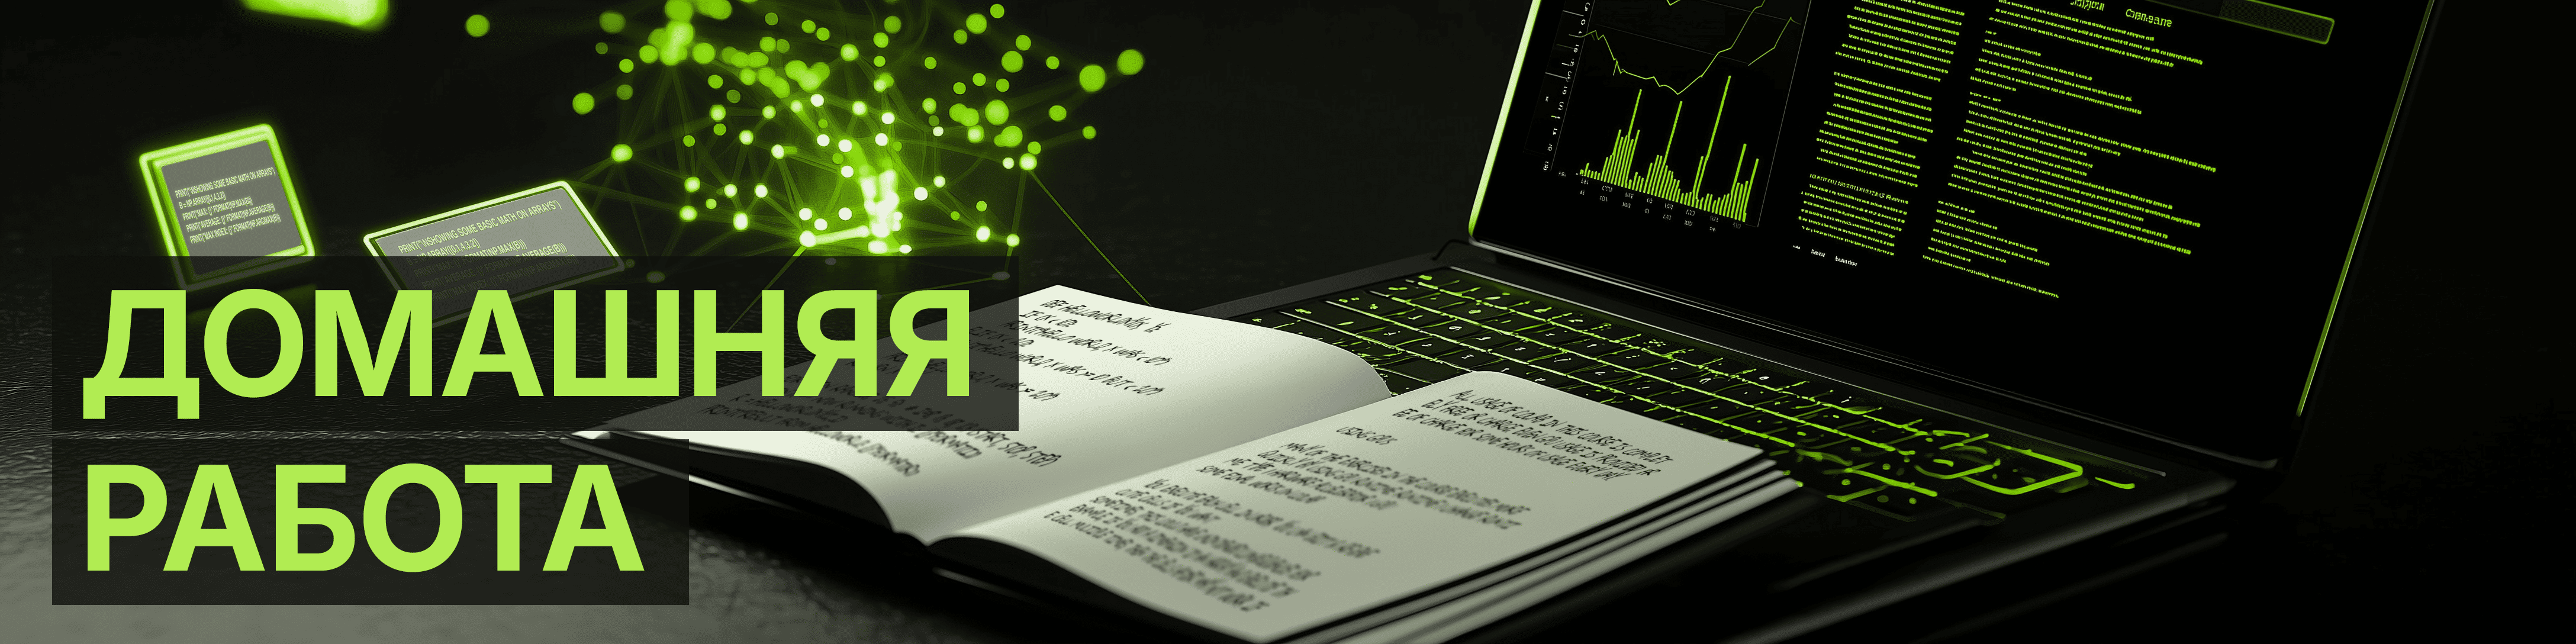

**Навигация по уроку**

1. [Простые нейронные сети. Знакомство с библиотекой Keras](https://colab.research.google.com/drive/16xfRAdyg-Re1bP2cyYpbpAALa6noUL3U)
2. [Распознание рукописных цифр (Практика)](https://colab.research.google.com/drive/1RaGkCutdIazFN5PtQOod5UH2Cc05diYI)
3. Домашняя работа

Используя датасет по рукописным буквам английского языка, обучите модель, оцените ее предсказательные способности. Используйте только полносвязанные слои. Поэкспериментируйте с числом слоев и числом нейронов в слое, добейтесь максимальной точности. Используйте куски кода и рекомендации из практической части урока. Нарисуйте графики точности и потерь для обучающей и тестовой выборки, сделайте по ним выводы.

Оценка за задание:
* 1 балл - задача решена с помощью куратора, точность на проверочной выборке ниже 85%
* 2 балла - задача решена с подсказками куратора, точность на проверочной выборке выше 85%
* 3 балла - задача решена самостоятельно, точность на проверочной выборке выше 85%
* 4 балла - задача решена самостоятельно, точность на проверочной выборке выше 93%
* 5 баллов - задача решена самостоятельно, точность на проверочной выборке выше 97%

In [1]:
import numpy as np
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

In [2]:
dataset

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [25.,  0.,  0., ...,  0.,  0.,  0.],
       [25.,  0.,  0., ...,  0.,  0.,  0.],
       [25.,  0.,  0., ...,  0.,  0.,  0.]])

In [3]:
X = dataset[:,1:785]
Y = dataset[:,0]

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
Y

array([ 0.,  0.,  0., ..., 25., 25., 25.])

In [6]:
# подчищаем память
del(dataset)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# подчищаем память, иначе вылитает
del(X)
del(Y)


In [8]:
import gc
gc.collect()

0

In [9]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
y_train

array([18., 13.,  6., ..., 22., 18., 14.])

In [11]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
y_test

array([22., 22., 18., ..., 18., 14., 12.])

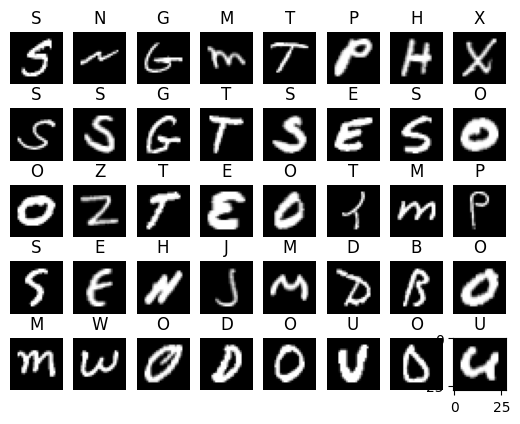

In [13]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = x_train[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(y_train[i]))
    im.imshow(x, cmap='gray')


In [14]:
# Ваше решение
from keras import Input, Model
from keras.layers import Dense

inputs = Input(shape=(28*28,), name="Input")
input = Dense(512, activation="relu")(inputs)

h1 = Dense(20, activation="relu")(input)

output = Dense(26, activation="softmax")(h1)

In [15]:
model = Model(inputs, output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │        10,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │           546 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,726 (1.57 MB)

 Trainable params: 412,726 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [17]:
# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
x_train = x_train/255
x_test = x_test/255

In [18]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 26)
y_test = to_categorical(y_test, 26)

In [19]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8419 - loss: 0.5941 - val_accuracy: 0.9607 - val_loss: 0.1425
Epoch 2/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9678 - loss: 0.1149 - val_accuracy: 0.9723 - val_loss: 0.0966
Epoch 3/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9782 - loss: 0.0768 - val_accuracy: 0.9749 - val_loss: 0.0923
Epoch 4/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9837 - loss: 0.0571 - val_accuracy: 0.9798 - val_loss: 0.0736
Epoch 5/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9866 - loss: 0.0456 - val_accuracy: 0.9817 - val_loss: 0.0697


In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

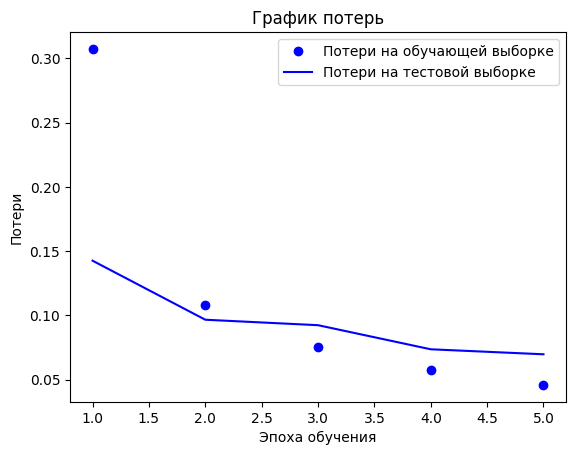

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

def print_history(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  epochs = range(1, len(loss_values) + 1)
  plt.plot(epochs, loss_values, 'bo', label='Потери на обучающей выборке')
  plt.plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке')
  plt.title('График потерь')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Потери')
  plt.legend()
  plt.show()

print_history(history)

Epoch 1/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9891 - loss: 0.0365 - val_accuracy: 0.9831 - val_loss: 0.0657
Epoch 2/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9913 - loss: 0.0299 - val_accuracy: 0.9838 - val_loss: 0.0656
Epoch 3/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9926 - loss: 0.0254 - val_accuracy: 0.9846 - val_loss: 0.0651
Epoch 4/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9933 - loss: 0.0215 - val_accuracy: 0.9868 - val_loss: 0.0614
Epoch 5/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9943 - loss: 0.0188 - val_accuracy: 0.9865 - val_loss: 0.0638


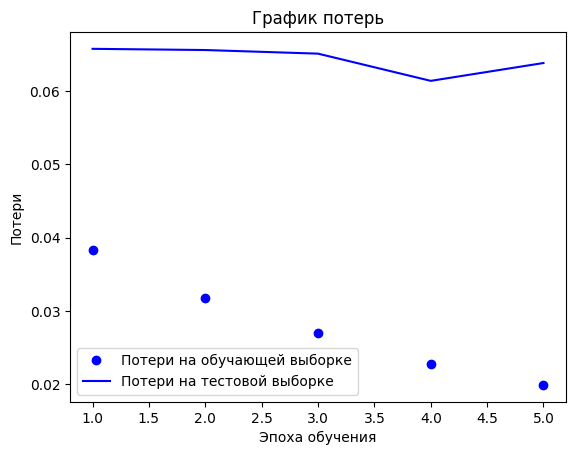

In [24]:
from keras import Input, Model
from keras.layers import Dense

inputs = Input(shape=(28*28,), name="Input")
input = Dense(256, activation="relu")(inputs)

# h1 = Dense(20, activation="softmax")(input)

output = Dense(26, activation="softmax")(input)

model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)
print_history(history)

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 26)             │        13,338 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 830,518 (3.17 MB)

 Trainable params: 415,258 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 415,260 (1.58 MB)

Epoch 1/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8754 - loss: 0.4585 - val_accuracy: 0.9668 - val_loss: 0.1207
Epoch 2/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9714 - loss: 0.1043 - val_accuracy: 0.9742 - val_loss: 0.0949
Epoch 3/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9807 - loss: 0.0697 - val_accuracy: 0.9775 - val_loss: 0.0824
Epoch 4/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9848 - loss: 0.0551 - val_accuracy: 0.9785 - val_loss: 0.0806
Epoch 5/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9881 - loss: 0.0435 - val_accuracy: 0.9837 - val_loss: 0.0655
Epoch 6/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9905 - loss: 0.0351 - val_accuracy: 0.9843 - val_loss: 0.0628
Epoch 7/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9922 - loss: 0.0282 - val_accuracy: 0.9844 - val_loss: 0.0630
Epoch 8/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9935 - loss: 0.0232 -

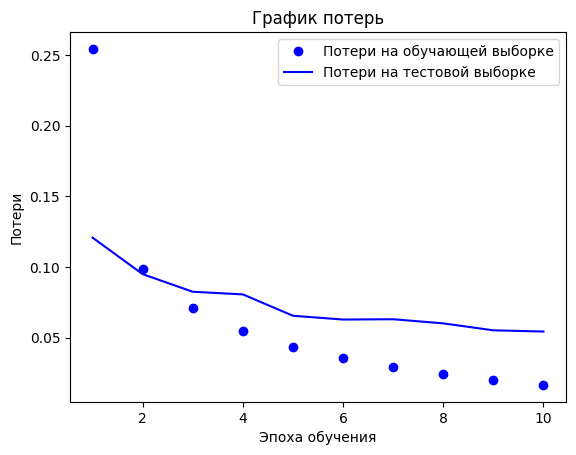

In [25]:
from keras.models import Sequential

model = Sequential()
model.add(Input(shape=(28*28,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(len(y_train[0]), activation='softmax'))

model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)
print_history(history)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 539,930 (2.06 MB)

 Trainable params: 539,930 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8835 - loss: 0.4122 - val_accuracy: 0.9723 - val_loss: 0.0965
Epoch 2/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9757 - loss: 0.0846 - val_accuracy: 0.9782 - val_loss: 0.0761
Epoch 3/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9835 - loss: 0.0565 - val_accuracy: 0.9821 - val_loss: 0.0665
Epoch 4/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9877 - loss: 0.0414 - val_accuracy: 0.9834 - val_loss: 0.0646
Epoch 5/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9908 - loss: 0.0313 - val_accuracy: 0.9863 - val_loss: 0.0549
Epoch 6/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9922 - loss: 0.0258 - val_accuracy: 0.9872 - val_loss: 0.0550
Epoch 7/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9939 - loss: 0.0202 - val_accuracy: 0.9881 - val_loss: 0.0561
Epoch 8/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9947 - loss: 0.0170 -

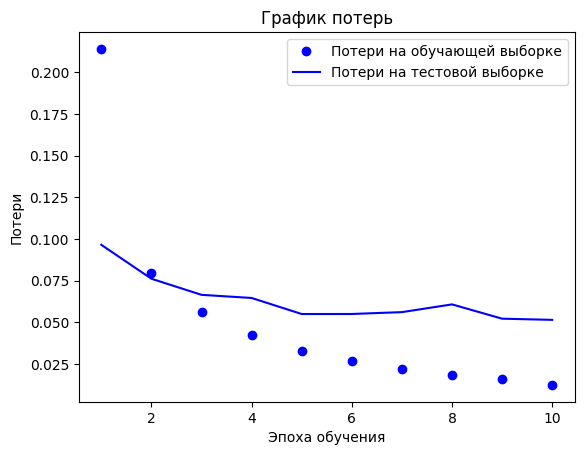

In [28]:
from keras.models import Sequential

model = Sequential()
model.add(Input(shape=(28*28,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(len(y_train[0]), activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)
print_history(history)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 569,498 (2.17 MB)

 Trainable params: 569,498 (2.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.5236 - loss: 1.6623 - val_accuracy: 0.9142 - val_loss: 0.3525
Epoch 2/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9328 - loss: 0.2755 - val_accuracy: 0.9513 - val_loss: 0.2070
Epoch 3/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9567 - loss: 0.1793 - val_accuracy: 0.9491 - val_loss: 0.2075
Epoch 4/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9645 - loss: 0.1441 - val_accuracy: 0.9612 - val_loss: 0.1658
Epoch 5/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9700 - loss: 0.1203 - val_accuracy: 0.9646 - val_loss: 0.1527
Epoch 6/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9740 - loss: 0.1071 - val_accuracy: 0.9654 - val_loss: 0.1517
Epoch 7/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9771 - loss: 0.0924 - val_accuracy: 0.9689 - val_loss: 0.1383
Epoch 8/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9793 - loss: 0.0815 

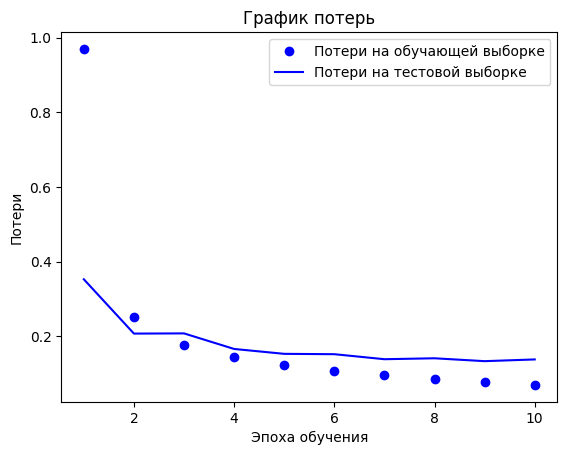

In [29]:
from keras.models import Sequential

model = Sequential()
model.add(Input(shape=(28*28,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='softmax'))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(y_train[0]), activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)
print_history(history)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 802,586 (3.06 MB)

 Trainable params: 802,586 (3.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.4788 - loss: 1.7433 - val_accuracy: 0.9080 - val_loss: 0.3951
Epoch 2/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9145 - loss: 0.3562 - val_accuracy: 0.9347 - val_loss: 0.2804
Epoch 3/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9434 - loss: 0.2362 - val_accuracy: 0.9454 - val_loss: 0.2274
Epoch 4/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9569 - loss: 0.1763 - val_accuracy: 0.9598 - val_loss: 0.1728
Epoch 5/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9671 - loss: 0.1319 - val_accuracy: 0.9627 - val_loss: 0.1558
Epoch 6/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9737 - loss: 0.1049 - val_accuracy: 0.9669 - val_loss: 0.1366
Epoch 7/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9786 - loss: 0.0855 - val_accuracy: 0.9700 - val_loss: 0.1269
Epoch 8/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9814 - loss: 0.0731 -

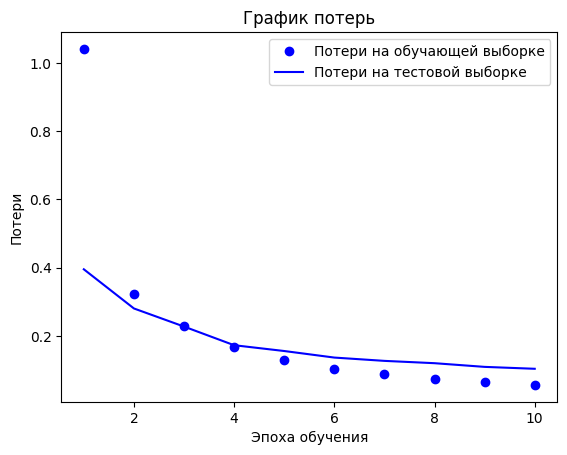

In [30]:
from keras.models import Sequential

model = Sequential()
model.add(Input(shape=(28*28,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='softmax'))
model.add(Dense(256, activation='relu'))
model.add(Dense(len(y_train[0]), activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)
print_history(history)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897,946 (3.43 MB)

 Trainable params: 897,946 (3.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.1569 - loss: 2.9679 - val_accuracy: 0.1538 - val_loss: 2.9310
Epoch 2/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1556 - loss: 2.9300 - val_accuracy: 0.1538 - val_loss: 2.9309
Epoch 3/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1557 - loss: 2.9294 - val_accuracy: 0.1538 - val_loss: 2.9308
Epoch 4/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1566 - loss: 2.9258 - val_accuracy: 0.2374 - val_loss: 2.4633
Epoch 5/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.2967 - loss: 2.1754 - val_accuracy: 0.7117 - val_loss: 0.9474
Epoch 6/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7983 - loss: 0.6990 - val_accuracy: 0.9205 - val_loss: 0.3580
Epoch 7/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9353 - loss: 0.2876 - val_accuracy: 0.9462 - val_loss: 0.2400
Epoch 8/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9575 - loss: 0.1860 -

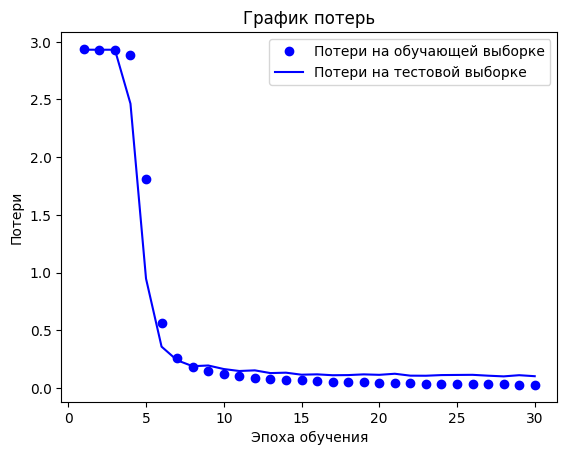

In [32]:
from keras.models import Sequential

model = Sequential()
model.add(Input(shape=(28*28,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='softmax'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='softmax'))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(y_train[0]), activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=128)
print_history(history)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897,946 (3.43 MB)

 Trainable params: 897,946 (3.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8518 - loss: 0.5147 - val_accuracy: 0.9660 - val_loss: 0.1207
Epoch 2/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9716 - loss: 0.1008 - val_accuracy: 0.9740 - val_loss: 0.0920
Epoch 3/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9794 - loss: 0.0736 - val_accuracy: 0.9743 - val_loss: 0.0999
Epoch 4/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9845 - loss: 0.0591 - val_accuracy: 0.9810 - val_loss: 0.0796
Epoch 5/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9863 - loss: 0.0547 - val_accuracy: 0.9834 - val_loss: 0.0738
Epoch 6/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9875 - loss: 0.0527 - val_accuracy: 0.9810 - val_loss: 0.1068
Epoch 7/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9882 - loss: 0.0524 - val_accuracy: 0.9830 - val_loss: 0.0931
Epoch 8/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9897 - loss: 0.0471 -

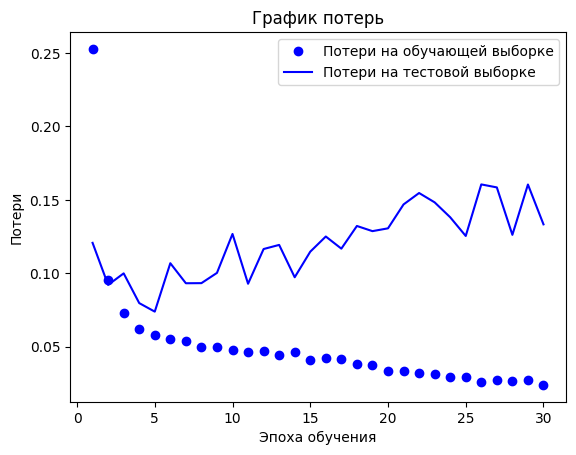

In [33]:
from keras.models import Sequential

model = Sequential()
model.add(Input(shape=(28*28,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(y_train[0]), activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=128)
print_history(history)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 539,930 (2.06 MB)

 Trainable params: 539,930 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8832 - loss: 0.4177 - val_accuracy: 0.9688 - val_loss: 0.1081
Epoch 2/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9757 - loss: 0.0841 - val_accuracy: 0.9784 - val_loss: 0.0777
Epoch 3/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9837 - loss: 0.0553 - val_accuracy: 0.9794 - val_loss: 0.0733
Epoch 4/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9875 - loss: 0.0419 - val_accuracy: 0.9846 - val_loss: 0.0626
Epoch 5/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9901 - loss: 0.0324 - val_accuracy: 0.9841 - val_loss: 0.0654
Epoch 6/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9928 - loss: 0.0239 - val_accuracy: 0.9867 - val_loss: 0.0571
Epoch 7/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9939 - loss: 0.0199 - val_accuracy: 0.9886 - val_loss: 0.0540
Epoch 8/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9953 - loss: 0.0159 

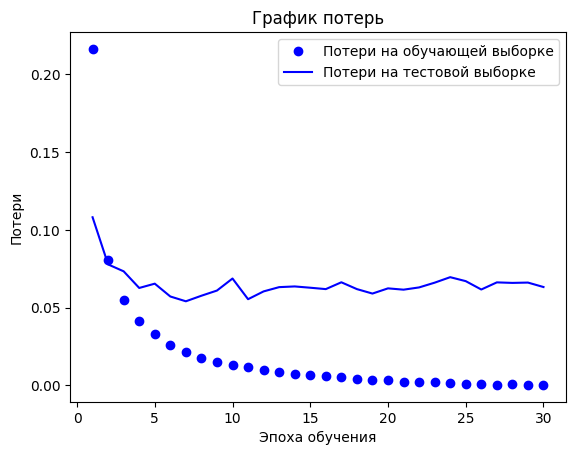

In [34]:
from keras.models import Sequential

model = Sequential()
model.add(Input(shape=(28*28,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(len(y_train[0]), activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=128)
print_history(history)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 26)             │        13,338 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 415,258 (1.58 MB)

 Trainable params: 415,258 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.2386 - loss: 2.8533 - val_accuracy: 0.2844 - val_loss: 2.3889
Epoch 2/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3318 - loss: 2.2494 - val_accuracy: 0.3716 - val_loss: 2.0258
Epoch 3/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3939 - loss: 1.9806 - val_accuracy: 0.4303 - val_loss: 1.8998
Epoch 4/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4321 - loss: 1.8801 - val_accuracy: 0.4451 - val_loss: 1.8325
Epoch 5/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4456 - loss: 1.8191 - val_accuracy: 0.4562 - val_loss: 1.7877
Epoch 6/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4547 - loss: 1.7854 - val_accuracy: 0.4601 - val_loss: 1.7576
Epoch 7/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4627 - loss: 1.7534 - val_accuracy: 0.4592 - val_loss: 1.7482
Epoch 8/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4666 - loss: 1.7342 -

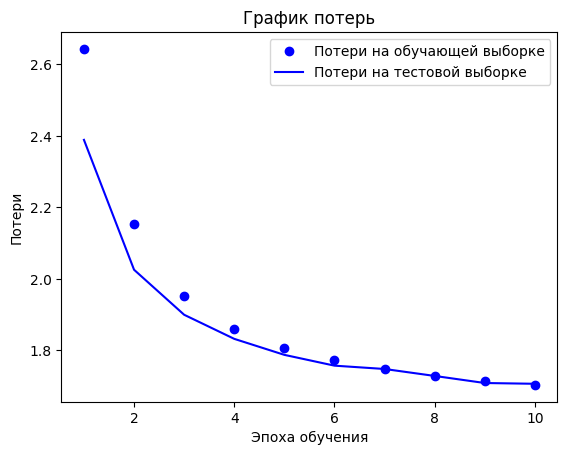

In [36]:
from keras.models import Sequential

model = Sequential()
model.add(Input(shape=(28*28,)))
model.add(Dense(512, activation='softmax'))
model.add(Dense(len(y_train[0]), activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)
print_history(history)

на графиках наблюдается такая картина, что использование скрытых слоев с relu практрически всегда улучшает результат на учебных даных, но в то же время после нескольких эпох начинают расходиться результаты проверки на учебных и валидационных данных.

улучшить сходимость позволяет функция активации softmax, но в то же время она впринципе ухудшает итоговые значения предсказаний.

увеличение количества эпох с использованием softmаx вляет положительно на результат, хоть и +- с 10й эпохи улучшение проходить малозаметно. с relu при увеличении эпох с +- 5 го шага начинает увеличиваться расходимость результатов.

количество слоев relu только ухудшает расходимость,(улучшает результат на обучающих, и ухудшает на валидационных). softmax можно использовать после слоя relu, для улучшения сходимости.

в итоге хоть softmax улучшает сходимость, результаты с использованием relu как скрытых слоев, показывают лучшие результаты.